In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
pd.set_option('display.max_rows',None)

## Importing the dataset

In [2]:
cp=pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
cp.head(5)

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [4]:
#Shape of the dataset
print('The number of rows (observations) is',cp.shape[0],'\n''The number of columns (variables) is',cp.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [6]:
cp.describe()

Co_Code  Networth Next Year  Equity Paid Up      Networth  \
count   3586.000000         3586.000000     3586.000000   3586.000000   
mean   16065.388734          725.045251       62.966584    649.746299   
std    19776.817379         4769.681004      778.761744   4091.988792   
min        4.000000        -8021.600000        0.000000  -7027.480000   
25%     3029.250000            3.985000        3.750000      3.892500   
50%     6077.500000           19.015000        8.290000     18.580000   
75%    24269.500000          123.802500       19.517500    117.297500   
max    72493.000000       111729.100000    42263.460000  81657.350000   

       Capital Employed     Total Debt   Gross Block   Net Working Capital   \
count       3586.000000    3586.000000    3586.000000           3586.000000   
mean        2799.611054    1994.823779     594.178829            410.809665   
std        26975.135385   23652.842746    4871.547802           6301.218546   
min        -1824.750000      -0.720000     -41.190000         -13162.420000   
25%            7.602500       0.030000       0.570000              0.942500   
50%           39.090000       7.490000      15.870000             10.145000   
75%          226.605000      72.350000     131.895000             61.175000   
max       714001.250000  652823.810000  128477.590000         223257.560000   

       Current Assets   Current Liabilities and Provisions   ...  \
count      3586.000000                          3586.000000  ...   
mean       1960.349172                           391.992078  ...   
std       22577.570829                          2675.001631  ...   
min          -0.910000                            -0.230000  ...   
25%           4.000000                             0.732500  ...   
50%          24.540000                             9.225000  ...   
75%         135.277500                            65.650000  ...   
max      721166.000000                         83232.980000  ...   

       PBIDTM (%)[Latest]  PBITM (%)[Latest]  PBDTM (%)[Latest]  \
count         3585.000000        3585.000000        3585.000000   
mean           -51.162890        -109.213414        -311.570357   
std           1795.131025        3057.635870       10921.592639   
min         -78870.450000     -141600.000000     -590500.000000   
25%              0.000000           0.000000           0.000000   
50%              8.070000           5.230000           4.690000   
75%             18.990000          14.290000          14.110000   
max          19233.330000       19195.700000       15640.000000   

       CPM (%)[Latest]  APATM (%)[Latest]  Debtors Velocity (Days)  \
count      3585.000000        3585.000000              3586.000000   
mean       -307.005632        -365.056187               603.894032   
std       10676.149629       12500.051387             10636.759580   
min     -572000.000000     -688600.000000                 0.000000   
25%           0.000000           0.000000                 8.000000   
50%           3.890000           1.590000                49.000000   
75%          11.390000           7.410000               106.000000   
max       15640.000000       15266.670000            514721.000000   

       Creditors Velocity (Days)  Inventory Velocity (Days)  \
count               3.586000e+03                3483.000000   
mean                2.057855e+03                  79.644559   
std                 5.416948e+04                 137.847792   
min                 0.000000e+00                -199.000000   
25%                 8.000000e+00                   0.000000   
50%                 3.900000e+01                  35.000000   
75%                 8.900000e+01                  96.000000   
max                 2.034145e+06                 996.000000   

       Value of Output/Total Assets  Value of Output/Gross Block  
count                   3586.000000                  3586.000000  
mean                       0.819757                    61.884548  
std                      

In [7]:
#Correlation
cp.corr()

Co_Code  Networth Next Year  \
Co_Code                              1.000000           -0.052519   
Networth Next Year                  -0.052519            1.000000   
Equity Paid Up                      -0.005923            0.364376   
Networth                            -0.056693            0.971500   
Capital Employed                    -0.042042            0.594155   
Total Debt                          -0.036870            0.480513   
Gross Block                         -0.043245            0.742405   
Net Working Capital                 -0.019953            0.240580   
Current Assets                      -0.038191            0.481718   
Current Liabilities and Provisions  -0.056355            0.777579   
Total Assets/Liabilities            -0.050236            0.821037   
Gross Sales                         -0.041289            0.593493   
Net Sales                           -0.041391            0.600618   
Other Income                        -0.047035            0.678346   
Value Of Output                     -0.041720            0.605301   
Cost of Production                  -0.033688            0.497055   
Selling Cost                        -0.062795            0.364037   
PBIDT                               -0.052736            0.760070   
PBDT                                -0.048206            0.860290   
PBIT                                -0.050186            0.704101   
PBT                                 -0.045221            0.805141   
PAT                                 -0.041432            0.787905   
Adjusted PAT                        -0.041221            0.777510   
CP                                  -0.045622            0.854636   
Revenue earnings in forex           -0.040652            0.436856   
Revenue expenses in forex           -0.027315            0.395118   
Capital expenses in forex           -0.022548            0.572393   
Book Value (Unit Curr)               0.050388            0.026351   
Book Value (Adj.) (Unit Curr)       -0.013365            0.004253   
Market Capitalisation               -0.057611            0.703192   
CEPS (annualised) (Unit Curr)        0.038102            0.011149   
Cash Flow From Operating Activities -0.014786            0.344339   
Cash Flow From Investing Activities  0.012111           -0.562411   
Cash Flow From Financing Activities  0.007039           -0.015127   
ROG-Net Worth (%)                    0.064757            0.003461   
ROG-Capital Employed (%)             0.053742            0.004571   
ROG-Gross Block (%)                  0.009248           -0.003156   
ROG-Gross Sales (%)                  0.042460           -0.005366   
ROG-Net Sales (%)                    0.042469           -0.005362   
ROG-Cost of Production (%)           0.064517           -0.007222   
ROG-Total Assets (%)                 0.051877            0.004759   
ROG-PBIDT (%)                        0.025952           -0.001490   
ROG-PBDT (%)                         0.027450           -0.001497   
ROG-PBIT (%)                         0.027373           -0.001515   
ROG-PBT (%)                          0.028578           -0.000705   
ROG-PAT (%)                          0.025146           -0.000199   
ROG-CP (%)                           0.028765           -0.001373   
ROG-Revenue earnings in forex (%)   -0.012250            0.020682   
ROG-Revenue expenses in forex (%)   -0.001344           -0.001876   
ROG-Market Capitalisation (%)       -0.024809           -0.003039   
Current Ratio[Latest]                0.035363           -0.014300   
Fixed Assets Ratio[Latest]           0.043518           -0.009200   
Inventory Ratio[Latest]              0.004780            0.189692   
Debtors Ratio[Latest]               -0.005284           -0.002456   
Total Asset Turnover Ratio[Latest]   0.062597           -0.028608   
Interest Cover Ratio[Latest]         0.007731            0.033619   
PBIDTM (%)[Latest]                   0.002949            0.005635   
PBITM (%)[Latest]                   

In [8]:
#Total Null values
cp.isna().sum().sum()

118

In [9]:
#Total Null values
cp.isna().sum()

Co_Code                                  0
Co_Name                                  0
Networth Next Year                       0
Equity Paid Up                           0
Networth                                 0
Capital Employed                         0
Total Debt                               0
Gross Block                              0
Net Working Capital                      0
Current Assets                           0
Current Liabilities and Provisions       0
Total Assets/Liabilities                 0
Gross Sales                              0
Net Sales                                0
Other Income                             0
Value Of Output                          0
Cost of Production                       0
Selling Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted PA

In [10]:
print('The number of duplicate records in the given dataset is',cp.duplicated().sum())

The number of duplicate records in the given dataset is 0


In [11]:
#Removing special characters from column names
cp.columns = cp.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('[', '_').str.replace(']', '').str.replace('/', '_to_').str.replace('-', '_')

In [12]:
cp.drop(['Co_Code','Co_Name'],axis=1,inplace=True)

## Imputation of missing values

In [13]:
col=list(cp)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

cp = pd.DataFrame(imputer.fit_transform(cp))
cp.columns=col
cp.head()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0            -8021.60          419.36  -7027.48          -1007.24     5936.03   
1            -3986.19         1954.93  -2968.08           4458.20     7410.18   
2            -3192.58           53.84    506.86           7714.68     6944.54   
3            -3054.51          157.30   -623.49           2353.88     2326.05   
4            -2967.36           50.30  -1070.83           4675.33     5740.90   

   Gross_Block  Net_Working_Capital  Current_Assets  \
0       474.30             -1076.34           40.50   
1      9070.86             -1098.88          486.86   
2      1281.54              4496.25         9097.64   
3      1033.69             -2612.42         1034.12   
4      1084.20              1836.23         4685.81   

   Current_Liabilities_and_Provisions  Total_Assets_to_Liabilities  ...  \
0                             1116.85                       109.60  ...   
1                             1585.74                      6043.94  ...   
2                             4601.39                     12316.07  ...   
3                             3646.54                      6000.42  ...   
4                             2849.58                      7524.91  ...   

   PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0                0.00               0.00               0.00             0.00   
1              -10.30             -39.74             -57.74           -57.74   
2            -5279.14           -5516.98           -7780.25         -7723.67   
3               -3.33              -7.21             -48.13           -47.70   
4             -295.55            -400.55            -845.88           379.79   

   APATM_perc_Latest  Debtors_Velocity_Days  Creditors_Velocity_Days  \
0               0.00                    0.0                      0.0   
1             -87.18                   29.0                    101.0   
2           -7961.51                   97.0                    558.0   
3             -51.58                   93.0                     63.0   
4             274.79                 3887.0                    346.0   

   Inventory_Velocity_Days  Value_of_Output_to_Total_Assets  \
0                     45.0                             0.00   
1                      2.0                             0.31   
2                      0.0                            -0.03   
3                      2.0                             0.24   
4                      0.0                             0.01   

   Value_of_Output_to_Gross_Block  
0                            0.00  
1                            0.24  
2                           -0.26  
3                            1.90  
4                            0.05  

[5 rows x 65 columns]

In [14]:
#Verifying null values
cp.isnull().sum()

Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_to_Liabilities            0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Revenue_earnings_in_forex              0
Revenue_expenses

In [15]:
#Removing outlier in DF
cp1=cp.copy()
#Without outlier removal in DF
cp11=cp.copy()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in cp1.columns:
    if cp1[column].dtype != 'object': 
        lr,ur=remove_outlier(cp1[column])
        cp1[column]=np.where(cp1[column]>ur,ur,cp1[column])
        cp1[column]=np.where(cp1[column]<lr,lr,cp1[column])

## Selecting important variables

Profitability ratios, Liquidity and Leverage ratios are important variables. The new dataframe cp_2 is a collection of such important variables fetched from the source dataframe

In [18]:
cp_2=cp[['Networth_Next_Year','PBIDT','PBDT','PBIT','PBT','PAT','Adjusted_PAT','ROG_Total_Assets_perc',
         'Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Inventory_Ratio_Latest','Debtors_Ratio_Latest',
         'Total_Asset_Turnover_Ratio_Latest','Interest_Cover_Ratio_Latest']]

In [19]:
cp_2.corr()

Networth_Next_Year     PBIDT      PBDT  \
Networth_Next_Year                           1.000000  0.760070  0.860290   
PBIDT                                        0.760070  1.000000  0.767398   
PBDT                                         0.860290  0.767398  1.000000   
PBIT                                         0.704101  0.993365  0.714482   
PBT                                          0.805141  0.778678  0.978305   
PAT                                          0.787905  0.744135  0.967552   
Adjusted_PAT                                 0.777510  0.754622  0.953854   
ROG_Total_Assets_perc                        0.004759 -0.002854 -0.003111   
Current_Ratio_Latest                        -0.014297 -0.012779 -0.011761   
Fixed_Assets_Ratio_Latest                   -0.009198 -0.008795 -0.008012   
Inventory_Ratio_Latest                       0.189694  0.098004  0.196341   
Debtors_Ratio_Latest                        -0.002454 -0.004537 -0.001498   
Total_Asset_Turnover_Ratio_Latest           -0.028601 -0.031736 -0.012057   
Interest_Cover_Ratio_Latest                  0.033620  0.025141  0.057930   

                                       PBIT       PBT       PAT  Adjusted_PAT  \
Networth_Next_Year                 0.704101  0.805141  0.787905      0.777510   
PBIDT                              0.993365  0.778678  0.744135      0.754622   
PBDT                               0.714482  0.978305  0.967552      0.953854   
PBIT                               1.000000  0.746946  0.710947      0.725237   
PBT                                0.746946  1.000000  0.988037      0.979170   
PAT                                0.710947  0.988037  1.000000      0.984331   
Adjusted_PAT                       0.725237  0.979170  0.984331      1.000000   
ROG_Total_Assets_perc             -0.002670 -0.002942 -0.002919     -0.003091   
Current_Ratio_Latest              -0.011775 -0.010161 -0.009270     -0.009715   
Fixed_Assets_Ratio_Latest         -0.008068 -0.006810 -0.006108     -0.006726   
Inventory_Ratio_Latest             0.068253  0.153774  0.165480      0.145396   
Debtors_Ratio_Latest              -0.004352 -0.000804 -0.000082     -0.000217   
Total_Asset_Turnover_Ratio_Latest -0.032546 -0.012374 -0.012294     -0.014054   
Interest_Cover_Ratio_Latest        0.024993  0.065807  0.072446      0.077048   

                                   ROG_Total_Assets_perc  \
Networth_Next_Year                              0.004759   
PBIDT                                          -0.002854   
PBDT                                           -0.003111   
PBIT                                           -0.002670   
PBT                                            -0.002942   
PAT                                            -0.002919   
Adjusted_PAT                                   -0.003091   
ROG_Total_Assets_perc                           1.000000   
Current_Ratio_Latest                           -0.002217   
Fixed_Assets_Ratio_Latest                       0.024998   
Inventory_Ratio_Latest                          0.004425   
Debtors_Ratio_Latest                           -0.001127   
Total_Asset_Turnover_Ratio_Latest              -0.007969   
Interest_Cover_Ratio_Latest                    -0.000993   

                                   Current_Ratio_Latest  \
Networth_Next_Year                            -0.014297   
PBIDT                                         -0.012779   
PBDT                                          -0.011761   
PBIT                                          -0.011775   
PBT                                           -0.010161   
PAT                                           -0.009270   
Adjusted_PAT                                  -0.009715   
ROG_Total_Assets_perc                         -0.002217   
Current_Ratio_Latest                           1.000000   
Fixed_Assets_Ratio_Latest                      0.001785   
Inventory_Ratio_Latest                        -0.006893   
Debtors_Ratio_Latest                          -0.00542

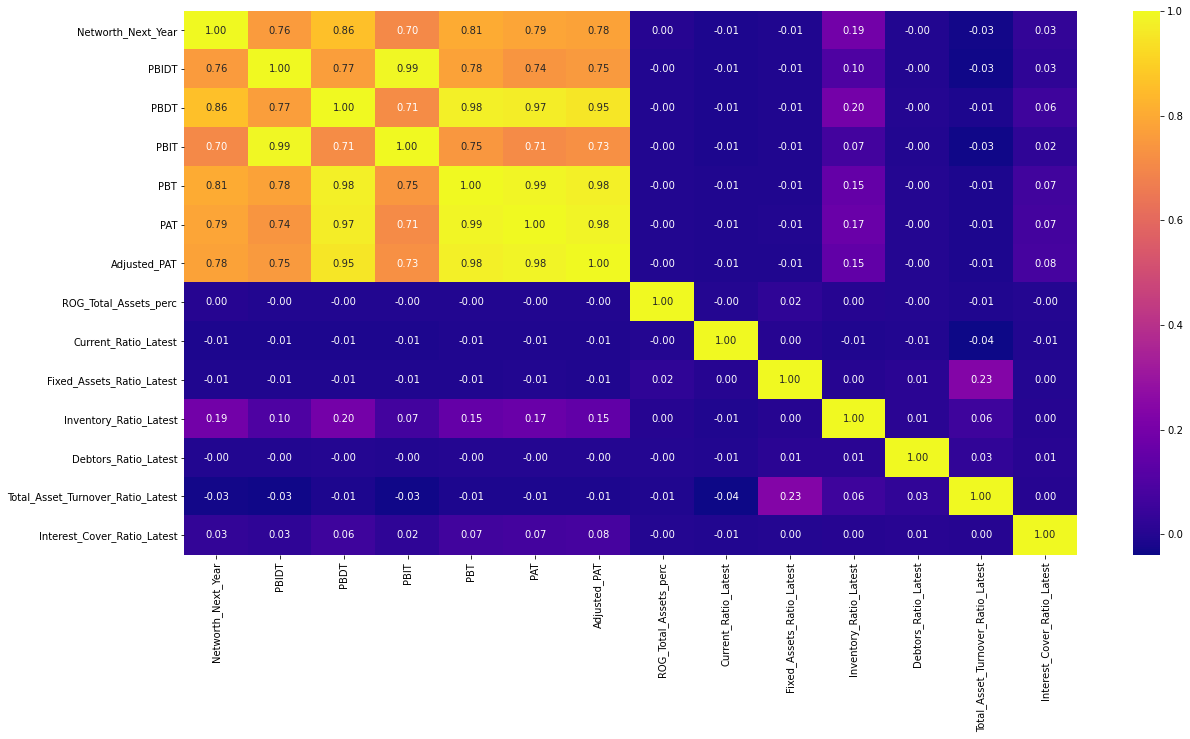

In [20]:
plt.subplots(figsize = (20,10))
sns.heatmap(cp_2.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

In [21]:
cp_2.mean()

Networth_Next_Year                    725.045251
PBIDT                                 248.175282
PBDT                                  116.268795
PBIT                                  217.659395
PBT                                    85.752909
PAT                                    61.218313
Adjusted_PAT                           60.058963
ROG_Total_Assets_perc                2793.282621
Current_Ratio_Latest                   12.053620
Fixed_Assets_Ratio_Latest              51.524902
Inventory_Ratio_Latest                 37.789398
Debtors_Ratio_Latest                   33.018851
Total_Asset_Turnover_Ratio_Latest       1.237058
Interest_Cover_Ratio_Latest            16.383625
dtype: float64

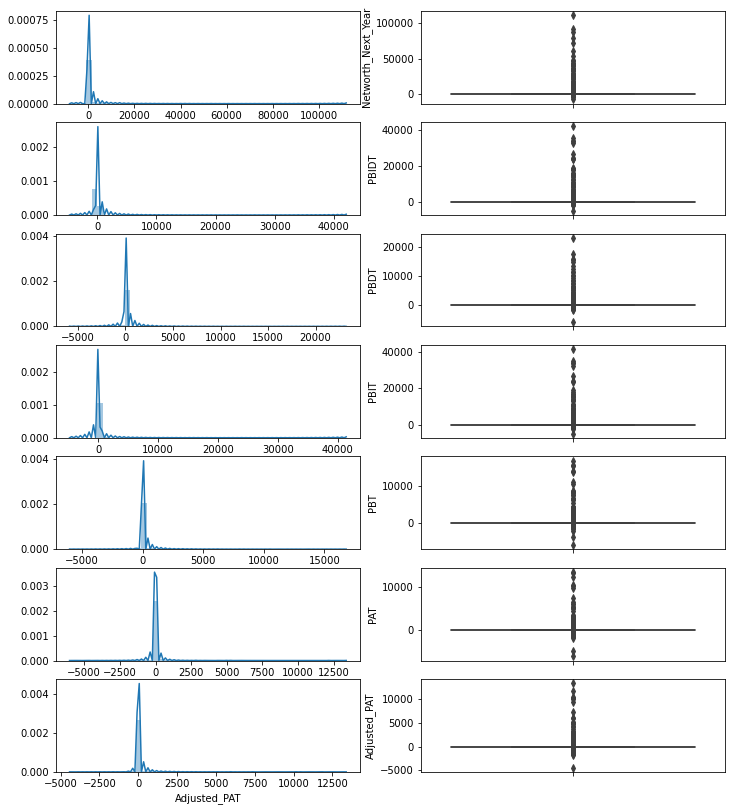

In [22]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(cp['Networth_Next_Year'] , ax=axes[0][0])
a = sns.boxplot(cp['Networth_Next_Year'] , orient = "v" , ax=axes[0][1])

a = sns.distplot(cp['PBIDT'] , ax=axes[1][0])
a = sns.boxplot(cp['PBIDT'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(cp['PBDT'] , ax=axes[2][0])
a = sns.boxplot(cp['PBDT'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(cp['PBIT'] , ax=axes[3][0])
a = sns.boxplot(cp['PBIT'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(cp['PBT'] , ax=axes[4][0])
a = sns.boxplot(cp['PBT'] , orient = "v" , ax=axes[4][1])

a = sns.distplot(cp['PAT'] , ax=axes[5][0])
a = sns.boxplot(cp['PAT'] , orient = "v" , ax=axes[5][1])

a = sns.distplot(cp['Adjusted_PAT'] , ax=axes[6][0])
a = sns.boxplot(cp['Adjusted_PAT'] , orient = "v" , ax=axes[6][1])

plt.show()

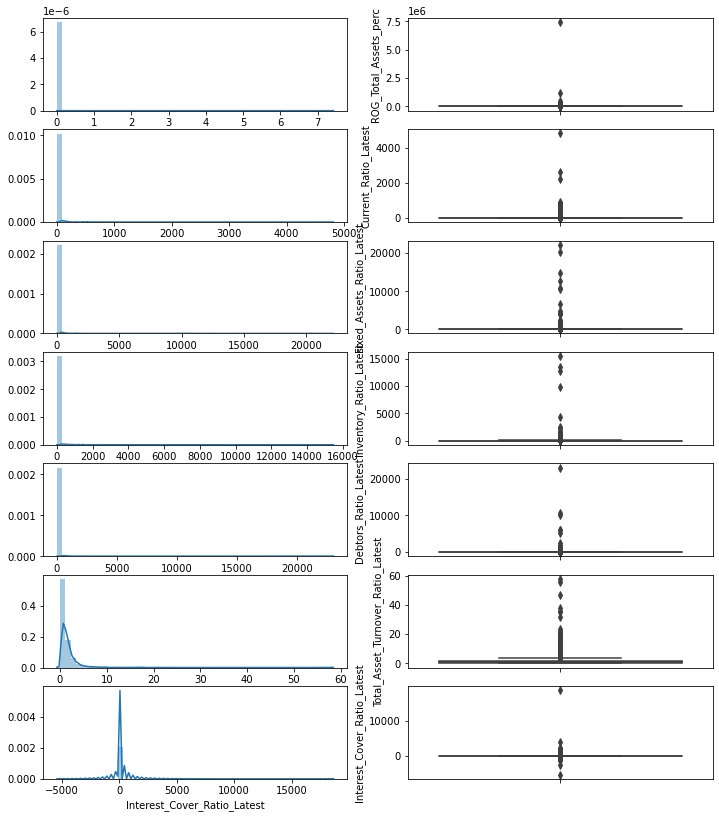

In [23]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(cp['ROG_Total_Assets_perc'] , ax=axes[0][0])
a = sns.boxplot(cp['ROG_Total_Assets_perc'] , orient = "v" , ax=axes[0][1])

a = sns.distplot(cp['Current_Ratio_Latest'] , ax=axes[1][0])
a = sns.boxplot(cp['Current_Ratio_Latest'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(cp['Fixed_Assets_Ratio_Latest'] , ax=axes[2][0])
a = sns.boxplot(cp['Fixed_Assets_Ratio_Latest'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(cp['Inventory_Ratio_Latest'] , ax=axes[3][0])
a = sns.boxplot(cp['Inventory_Ratio_Latest'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(cp['Debtors_Ratio_Latest'] , ax=axes[4][0])
a = sns.boxplot(cp['Debtors_Ratio_Latest'] , orient = "v" , ax=axes[4][1])

a = sns.distplot(cp['Total_Asset_Turnover_Ratio_Latest'] , ax=axes[5][0])
a = sns.boxplot(cp['Total_Asset_Turnover_Ratio_Latest'] , orient = "v" , ax=axes[5][1])

a = sns.distplot(cp['Interest_Cover_Ratio_Latest'] , ax=axes[6][0])
a = sns.boxplot(cp['Interest_Cover_Ratio_Latest'] , orient = "v" , ax=axes[6][1])

plt.show()

In [24]:
# fig, axes = plt.subplots(nrows=1,ncols=1)
# fig.set_size_inches(12, 14)
# a= plt.scatter(cp1['PBT'], cp1['Networth_Next_Year'], edgecolors='r',ax=axes[0][0])
# # plt.xlabel('PBT')
# # plt.ylabel('Networth_Next_Year')
# a.set_title('PBT vs Networth_Next_Year:After outlier removal')
# # plt.show()
# a= plt.scatter(cp11['PBT'], cp11['Networth_Next_Year'], edgecolors='r',ax=axes[0][1])
# # plt.xlabel('PBT')
# # plt.ylabel('Networth_Next_Year')
# a.set_title('PBT vs Networth_Next_Year:Before outlier removal')
# # plt.show()
# # a = sns.distplot(cp['Networth_Next_Year'] , ax=axes[0][0])
# # a = sns.boxplot(cp['Networth_Next_Year'] , orient = "v" , ax=axes[0][1])
# # a.set_title("Top25perc Distribution",fontsize=10)
# # a = sns.distplot(cp['PBIDT'] , ax=axes[1][0])
# # a = sns.boxplot(cp['PBIDT'] , orient = "v" , ax=axes[1][1])
# # a.set_title("Top25perc Distribution",fontsize=10)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

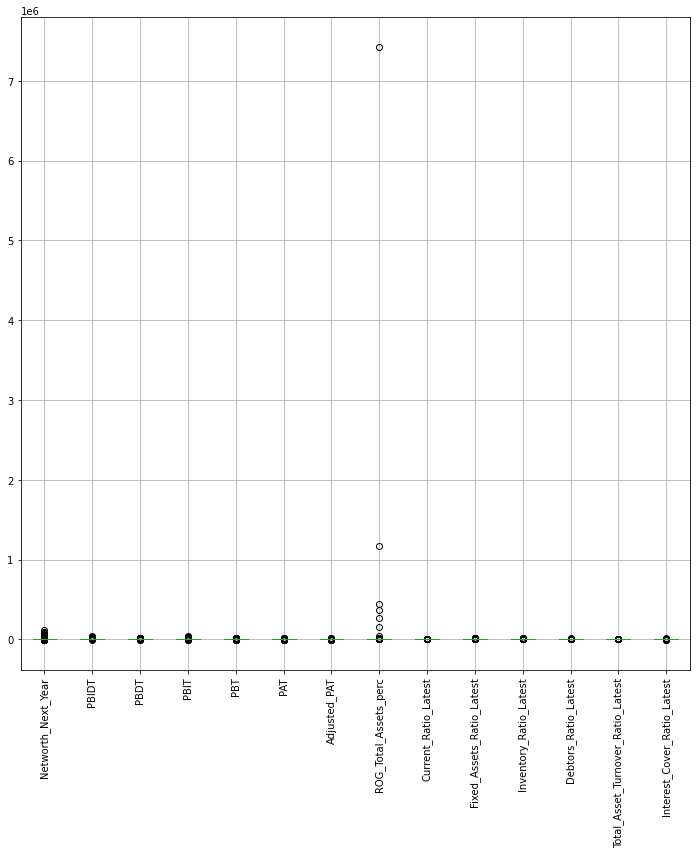

In [25]:
plt.figure(figsize=(12,12))
cp_2.boxplot()
plt.xticks(rotation = 90)

## Outlier treatment for significant variables

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
for column in cp_2.columns:
    if cp_2[column].dtype != 'object': 
        lr,ur=remove_outlier(cp_2[column])
        cp_2[column]=np.where(cp_2[column]>ur,ur,cp_2[column])
        cp_2[column]=np.where(cp_2[column]<lr,lr,cp_2[column])

In [28]:
cp_2.describe().transpose()

count       mean         std        min  \
Networth_Next_Year                 3586.0  77.399862  120.475995 -175.74125   
PBIDT                              3586.0  14.161569   23.752052  -35.18750   
PBDT                               3586.0   7.013376   14.217803  -19.41750   
PBIT                               3586.0   9.393051   17.456131  -25.00125   
PBT                                3586.0   3.494844    8.714200  -11.28375   
PAT                                3586.0   2.583009    6.563022   -8.46000   
Adjusted_PAT                       3586.0   2.407965    6.361349   -8.23875   
ROG_Total_Assets_perc              3586.0   4.274319   16.373758  -28.68125   
Current_Ratio_Latest               3586.0   2.084084    1.806351    0.00000   
Fixed_Assets_Ratio_Latest          3586.0   3.310121    3.970312    0.00000   
Inventory_Ratio_Latest             3586.0   6.070571    7.309985    0.00000   
Debtors_Ratio_Latest               3586.0   5.989649    6.624602    0.00000   
Total_Asset_Turnover_Ratio_Latest  3586.0   0.990337    1.110387    0.00000   
Interest_Cover_Ratio_Latest        3586.0   2.078465    3.912223   -5.56500   

                                      25%     50%       75%        max  
Networth_Next_Year                 3.9850  19.015  123.8025  303.52875  
PBIDT                              0.0400   2.045   23.5250   58.75250  
PBDT                               0.0000   0.795   12.9450   32.36250  
PBIT                               0.0000   1.150   16.6675   41.66875  
PBT                               -0.0600   0.310    7.4225   18.64625  
PAT                               -0.0600   0.255    5.5400   13.94000  
Adjusted_PAT                      -0.0900   0.210    5.3425   13.49125  
ROG_Total_Assets_perc             -3.9725   1.475   12.5000   37.20875  
Current_Ratio_Latest               0.8800   1.360    2.7700    5.60500  
Fixed_Assets_Ratio_Latest          0.2700   1.560    4.7400   11.44500  
Inventory_Ratio_Latest             0.0000   3.560    8.9375   22.34375  
Debtors_Ratio_Latest               0.4200   3.820    8.5175   20.66375  
Total_Asset_Turnover_Ratio_Latest  0.0700   0.600    1.5500    3.77000  
Interest_Cover_Ratio_Latest        0.0000   1.080    3.7100    9.27500

In [29]:
cp_2.median()

Networth_Next_Year                   19.015
PBIDT                                 2.045
PBDT                                  0.795
PBIT                                  1.150
PBT                                   0.310
PAT                                   0.255
Adjusted_PAT                          0.210
ROG_Total_Assets_perc                 1.475
Current_Ratio_Latest                  1.360
Fixed_Assets_Ratio_Latest             1.560
Inventory_Ratio_Latest                3.560
Debtors_Ratio_Latest                  3.820
Total_Asset_Turnover_Ratio_Latest     0.600
Interest_Cover_Ratio_Latest           1.080
dtype: float64

In [30]:
cp_2.skew()

Networth_Next_Year                   0.878023
PBIDT                                0.902266
PBDT                                 0.662730
PBIT                                 0.771029
PBT                                  0.547617
PAT                                  0.529133
Adjusted_PAT                         0.532881
ROG_Total_Assets_perc                0.314249
Current_Ratio_Latest                 1.049903
Fixed_Assets_Ratio_Latest            1.180931
Inventory_Ratio_Latest               1.194401
Debtors_Ratio_Latest                 1.174132
Total_Asset_Turnover_Ratio_Latest    1.175943
Interest_Cover_Ratio_Latest          0.497618
dtype: float64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

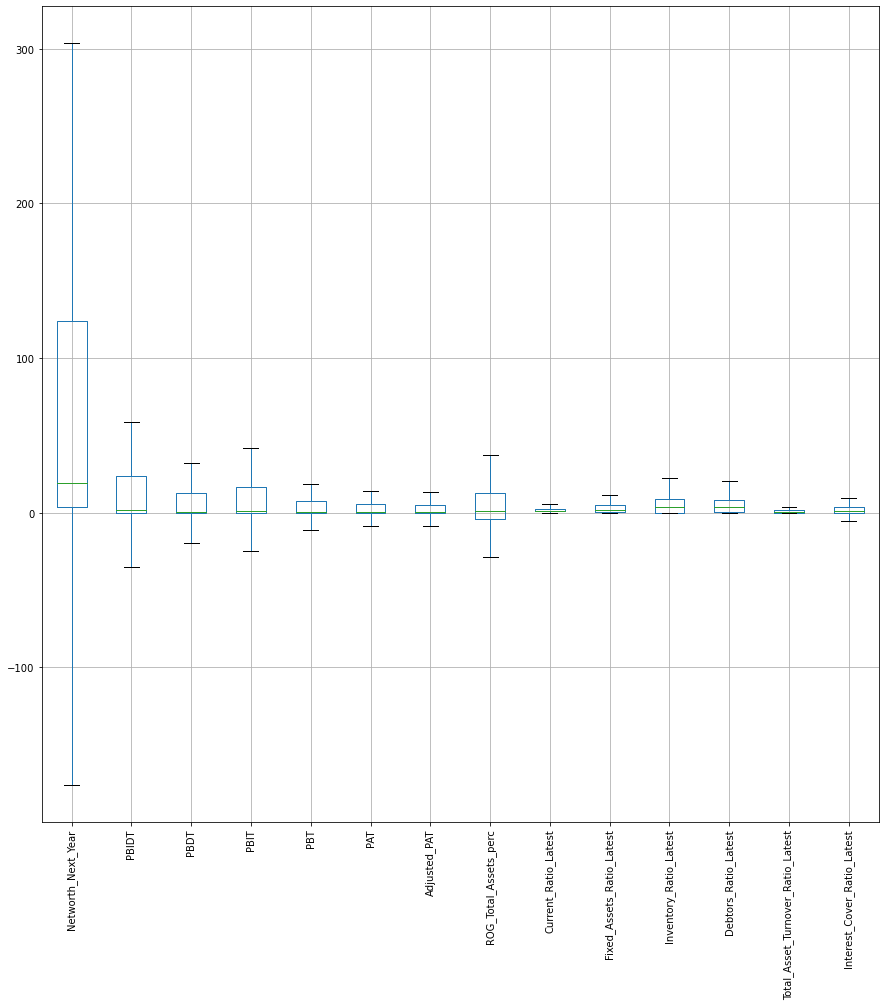

In [31]:
plt.figure(figsize=(15,15))
cp_2.boxplot()
plt.xticks(rotation = 90)

In [32]:
cp_2.mean()

Networth_Next_Year                   77.399862
PBIDT                                14.161569
PBDT                                  7.013376
PBIT                                  9.393051
PBT                                   3.494844
PAT                                   2.583009
Adjusted_PAT                          2.407965
ROG_Total_Assets_perc                 4.274319
Current_Ratio_Latest                  2.084084
Fixed_Assets_Ratio_Latest             3.310121
Inventory_Ratio_Latest                6.070571
Debtors_Ratio_Latest                  5.989649
Total_Asset_Turnover_Ratio_Latest     0.990337
Interest_Cover_Ratio_Latest           2.078465
dtype: float64

In [33]:
cp_2.min()

Networth_Next_Year                  -175.74125
PBIDT                                -35.18750
PBDT                                 -19.41750
PBIT                                 -25.00125
PBT                                  -11.28375
PAT                                   -8.46000
Adjusted_PAT                          -8.23875
ROG_Total_Assets_perc                -28.68125
Current_Ratio_Latest                   0.00000
Fixed_Assets_Ratio_Latest              0.00000
Inventory_Ratio_Latest                 0.00000
Debtors_Ratio_Latest                   0.00000
Total_Asset_Turnover_Ratio_Latest      0.00000
Interest_Cover_Ratio_Latest           -5.56500
dtype: float64

In [34]:
cp_2.skew()

Networth_Next_Year                   0.878023
PBIDT                                0.902266
PBDT                                 0.662730
PBIT                                 0.771029
PBT                                  0.547617
PAT                                  0.529133
Adjusted_PAT                         0.532881
ROG_Total_Assets_perc                0.314249
Current_Ratio_Latest                 1.049903
Fixed_Assets_Ratio_Latest            1.180931
Inventory_Ratio_Latest               1.194401
Debtors_Ratio_Latest                 1.174132
Total_Asset_Turnover_Ratio_Latest    1.175943
Interest_Cover_Ratio_Latest          0.497618
dtype: float64

In [35]:
cp_2.corr()

Networth_Next_Year     PBIDT      PBDT  \
Networth_Next_Year                           1.000000  0.798345  0.727385   
PBIDT                                        0.798345  1.000000  0.884665   
PBDT                                         0.727385  0.884665  1.000000   
PBIT                                         0.763025  0.958488  0.914815   
PBT                                          0.651801  0.782974  0.930179   
PAT                                          0.652664  0.780361  0.925628   
Adjusted_PAT                                 0.643431  0.747914  0.891265   
ROG_Total_Assets_perc                        0.176914  0.223749  0.253429   
Current_Ratio_Latest                        -0.106212 -0.178789 -0.089183   
Fixed_Assets_Ratio_Latest                    0.036439  0.023169  0.052698   
Inventory_Ratio_Latest                       0.130413  0.167579  0.170386   
Debtors_Ratio_Latest                         0.159227  0.183600  0.173550   
Total_Asset_Turnover_Ratio_Latest            0.039459  0.147346  0.171250   
Interest_Cover_Ratio_Latest                  0.339992  0.353366  0.427108   

                                       PBIT       PBT       PAT  Adjusted_PAT  \
Networth_Next_Year                 0.763025  0.651801  0.652664      0.643431   
PBIDT                              0.958488  0.782974  0.780361      0.747914   
PBDT                               0.914815  0.930179  0.925628      0.891265   
PBIT                               1.000000  0.856406  0.852231      0.817953   
PBT                                0.856406  1.000000  0.987314      0.954224   
PAT                                0.852231  0.987314  1.000000      0.960456   
Adjusted_PAT                       0.817953  0.954224  0.960456      1.000000   
ROG_Total_Assets_perc              0.249153  0.286900  0.292425      0.286402   
Current_Ratio_Latest              -0.136970 -0.024497 -0.020741     -0.017289   
Fixed_Assets_Ratio_Latest          0.068706  0.112198  0.112721      0.116367   
Inventory_Ratio_Latest             0.153958  0.150156  0.149895      0.145547   
Debtors_Ratio_Latest               0.165071  0.143581  0.150825      0.142069   
Total_Asset_Turnover_Ratio_Latest  0.154855  0.161412  0.159541      0.153992   
Interest_Cover_Ratio_Latest        0.382348  0.463080  0.458214      0.467251   

                                   ROG_Total_Assets_perc  \
Networth_Next_Year                              0.176914   
PBIDT                                           0.223749   
PBDT                                            0.253429   
PBIT                                            0.249153   
PBT                                             0.286900   
PAT                                             0.292425   
Adjusted_PAT                                    0.286402   
ROG_Total_Assets_perc                           1.000000   
Current_Ratio_Latest                            0.037338   
Fixed_Assets_Ratio_Latest                       0.220280   
Inventory_Ratio_Latest                          0.095514   
Debtors_Ratio_Latest                            0.074248   
Total_Asset_Turnover_Ratio_Latest               0.109004   
Interest_Cover_Ratio_Latest                     0.204962   

                                   Current_Ratio_Latest  \
Networth_Next_Year                            -0.106212   
PBIDT                                         -0.178789   
PBDT                                          -0.089183   
PBIT                                          -0.136970   
PBT                                           -0.024497   
PAT                                           -0.020741   
Adjusted_PAT                                  -0.017289   
ROG_Total_Assets_perc                          0.037338   
Current_Ratio_Latest                           1.000000   
Fixed_Assets_Ratio_Latest                      0.132252   
Inventory_Ratio_Latest                        -0.156032   
Debtors_Ratio_Latest                          -0.13051

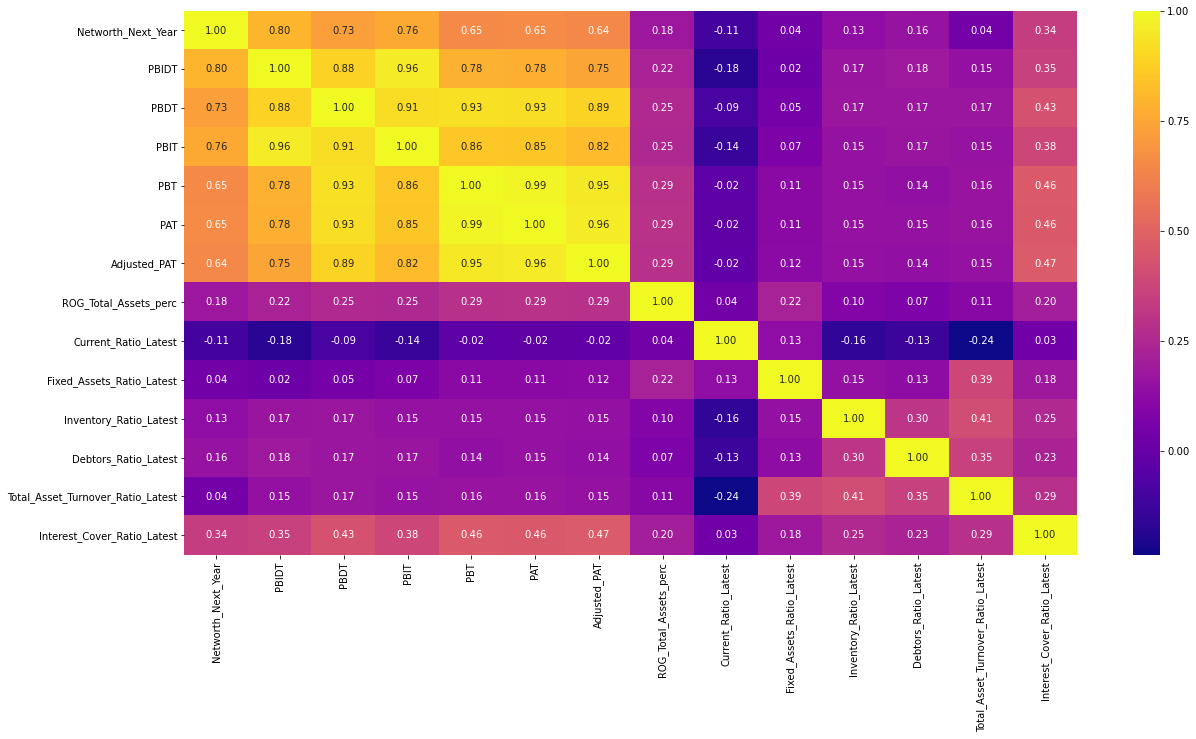

In [36]:
plt.subplots(figsize = (20,10))
sns.heatmap(cp_2.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

## Univariate Analysis

(array([  84.,   16.,   43., 1700.,  576.,  244.,  128.,   84.,   54.,
         657.]),
 array([-35.1875, -25.7935, -16.3995,  -7.0055,   2.3885,  11.7825,
         21.1765,  30.5705,  39.9645,  49.3585,  58.7525]),
 <a list of 10 Patch objects>)

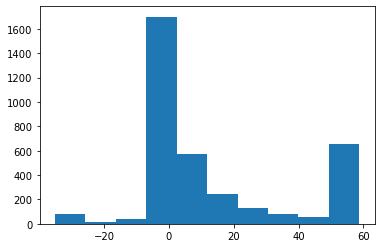

In [37]:
plt.hist(cp_2['PBIDT'])

(array([ 322.,   46.,  120., 1513.,  500.,  166.,   87.,   83.,   56.,
         693.]),
 array([-11.28375,  -8.29075,  -5.29775,  -2.30475,   0.68825,   3.68125,
          6.67425,   9.66725,  12.66025,  15.65325,  18.64625]),
 <a list of 10 Patch objects>)

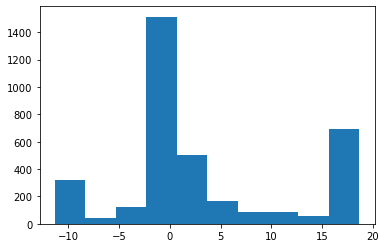

In [38]:
plt.hist(cp_2['PBT'])

(array([ 335.,   53.,  127., 1467.,  521.,  154.,   99.,   78.,   52.,
         700.]),
 array([-8.46, -6.22, -3.98, -1.74,  0.5 ,  2.74,  4.98,  7.22,  9.46,
        11.7 , 13.94]),
 <a list of 10 Patch objects>)

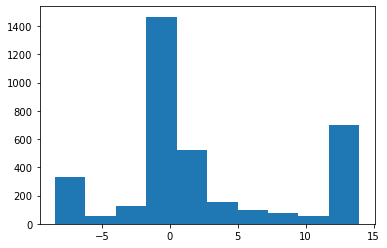

In [39]:
plt.hist(cp_2['PAT'])

(array([ 203.,   40.,   74., 1623.,  540.,  167.,  121.,   69.,   63.,
         686.]),
 array([-19.4175, -14.2395,  -9.0615,  -3.8835,   1.2945,   6.4725,
         11.6505,  16.8285,  22.0065,  27.1845,  32.3625]),
 <a list of 10 Patch objects>)

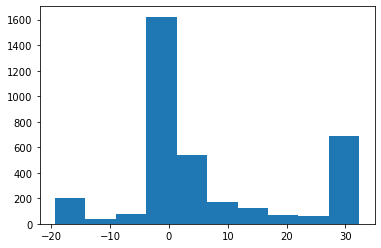

In [40]:
plt.hist(cp_2['PBDT'])

(array([ 135.,   37.,   63., 1668.,  542.,  212.,  122.,   95.,   67.,
         645.]),
 array([-25.00125, -18.33425, -11.66725,  -5.00025,   1.66675,   8.33375,
         15.00075,  21.66775,  28.33475,  35.00175,  41.66875]),
 <a list of 10 Patch objects>)

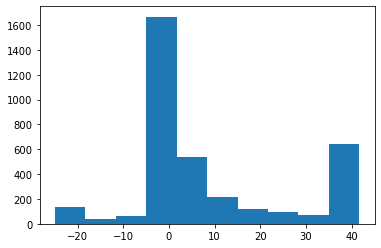

In [41]:
plt.hist(cp_2['PBIT'])

(array([ 347.,   51.,  128., 1481.,  501.,  161.,   97.,   79.,   53.,
         688.]),
 array([-8.23875, -6.06575, -3.89275, -1.71975,  0.45325,  2.62625,
         4.79925,  6.97225,  9.14525, 11.31825, 13.49125]),
 <a list of 10 Patch objects>)

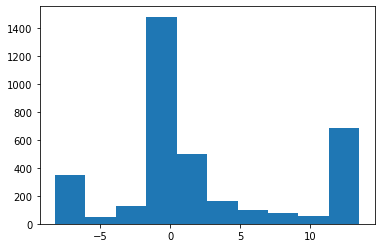

In [42]:
plt.hist(cp_2['Adjusted_PAT'])

(array([  83.,   14.,   51., 1552.,  701.,  237.,  147.,   84.,   71.,
         646.]),
 array([-175.74125, -127.81425,  -79.88725,  -31.96025,   15.96675,
          63.89375,  111.82075,  159.74775,  207.67475,  255.60175,
         303.52875]),
 <a list of 10 Patch objects>)

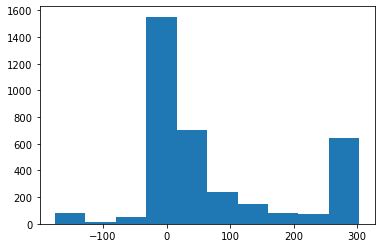

In [43]:
plt.hist(cp_2['Networth_Next_Year'])

(array([518., 824., 851., 337., 164., 115.,  91.,  52.,  35., 599.]),
 array([0.    , 0.5605, 1.121 , 1.6815, 2.242 , 2.8025, 3.363 , 3.9235,
        4.484 , 5.0445, 5.605 ]),
 <a list of 10 Patch objects>)

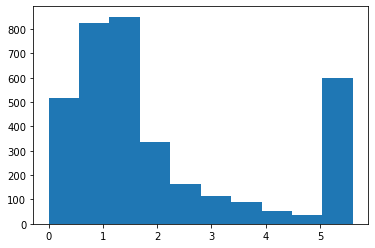

In [44]:
plt.hist(cp_2['Current_Ratio_Latest'])

(array([ 236.,  117.,  223.,  486., 1061.,  482.,  305.,  183.,  109.,
         384.]),
 array([-28.68125, -22.09225, -15.50325,  -8.91425,  -2.32525,   4.26375,
         10.85275,  17.44175,  24.03075,  30.61975,  37.20875]),
 <a list of 10 Patch objects>)

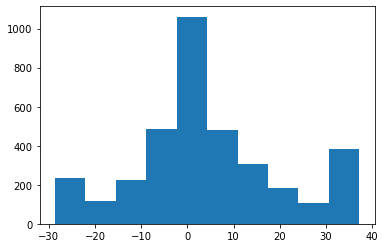

In [45]:
plt.hist(cp_2['ROG_Total_Assets_perc'])

(array([1542.,  604.,  324.,  191.,  142.,   87.,   63.,   56.,   42.,
         535.]),
 array([ 0.    ,  1.1445,  2.289 ,  3.4335,  4.578 ,  5.7225,  6.867 ,
         8.0115,  9.156 , 10.3005, 11.445 ]),
 <a list of 10 Patch objects>)

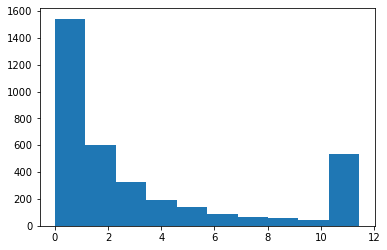

In [46]:
plt.hist(cp_2['Fixed_Assets_Ratio_Latest'])

(array([1566.,  401.,  372.,  313.,  247.,  185.,   97.,   96.,   64.,
         245.]),
 array([0.   , 0.377, 0.754, 1.131, 1.508, 1.885, 2.262, 2.639, 3.016,
        3.393, 3.77 ]),
 <a list of 10 Patch objects>)

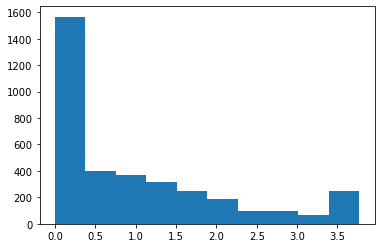

In [47]:
plt.hist(cp_2['Total_Asset_Turnover_Ratio_Latest'])

(array([1555.,  449.,  425.,  260.,  180.,  114.,   98.,   55.,   37.,
         413.]),
 array([ 0.      ,  2.234375,  4.46875 ,  6.703125,  8.9375  , 11.171875,
        13.40625 , 15.640625, 17.875   , 20.109375, 22.34375 ]),
 <a list of 10 Patch objects>)

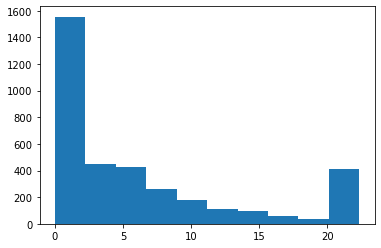

In [48]:
plt.hist(cp_2['Inventory_Ratio_Latest'])

(array([1308.,  582.,  497.,  280.,  182.,  129.,   83.,   66.,   45.,
         414.]),
 array([ 0.      ,  2.066375,  4.13275 ,  6.199125,  8.2655  , 10.331875,
        12.39825 , 14.464625, 16.531   , 18.597375, 20.66375 ]),
 <a list of 10 Patch objects>)

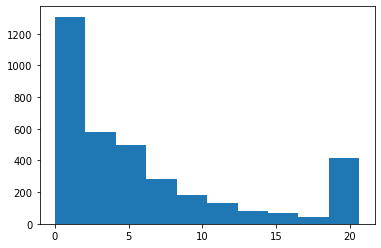

In [49]:
plt.hist(cp_2['Debtors_Ratio_Latest'])

(array([ 221.,   49.,   68., 1254.,  659.,  364.,  212.,  108.,   70.,
         581.]),
 array([-5.565, -4.081, -2.597, -1.113,  0.371,  1.855,  3.339,  4.823,
         6.307,  7.791,  9.275]),
 <a list of 10 Patch objects>)

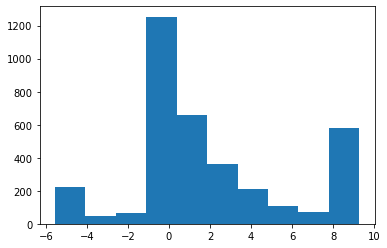

In [50]:
plt.hist(cp_2['Interest_Cover_Ratio_Latest'])

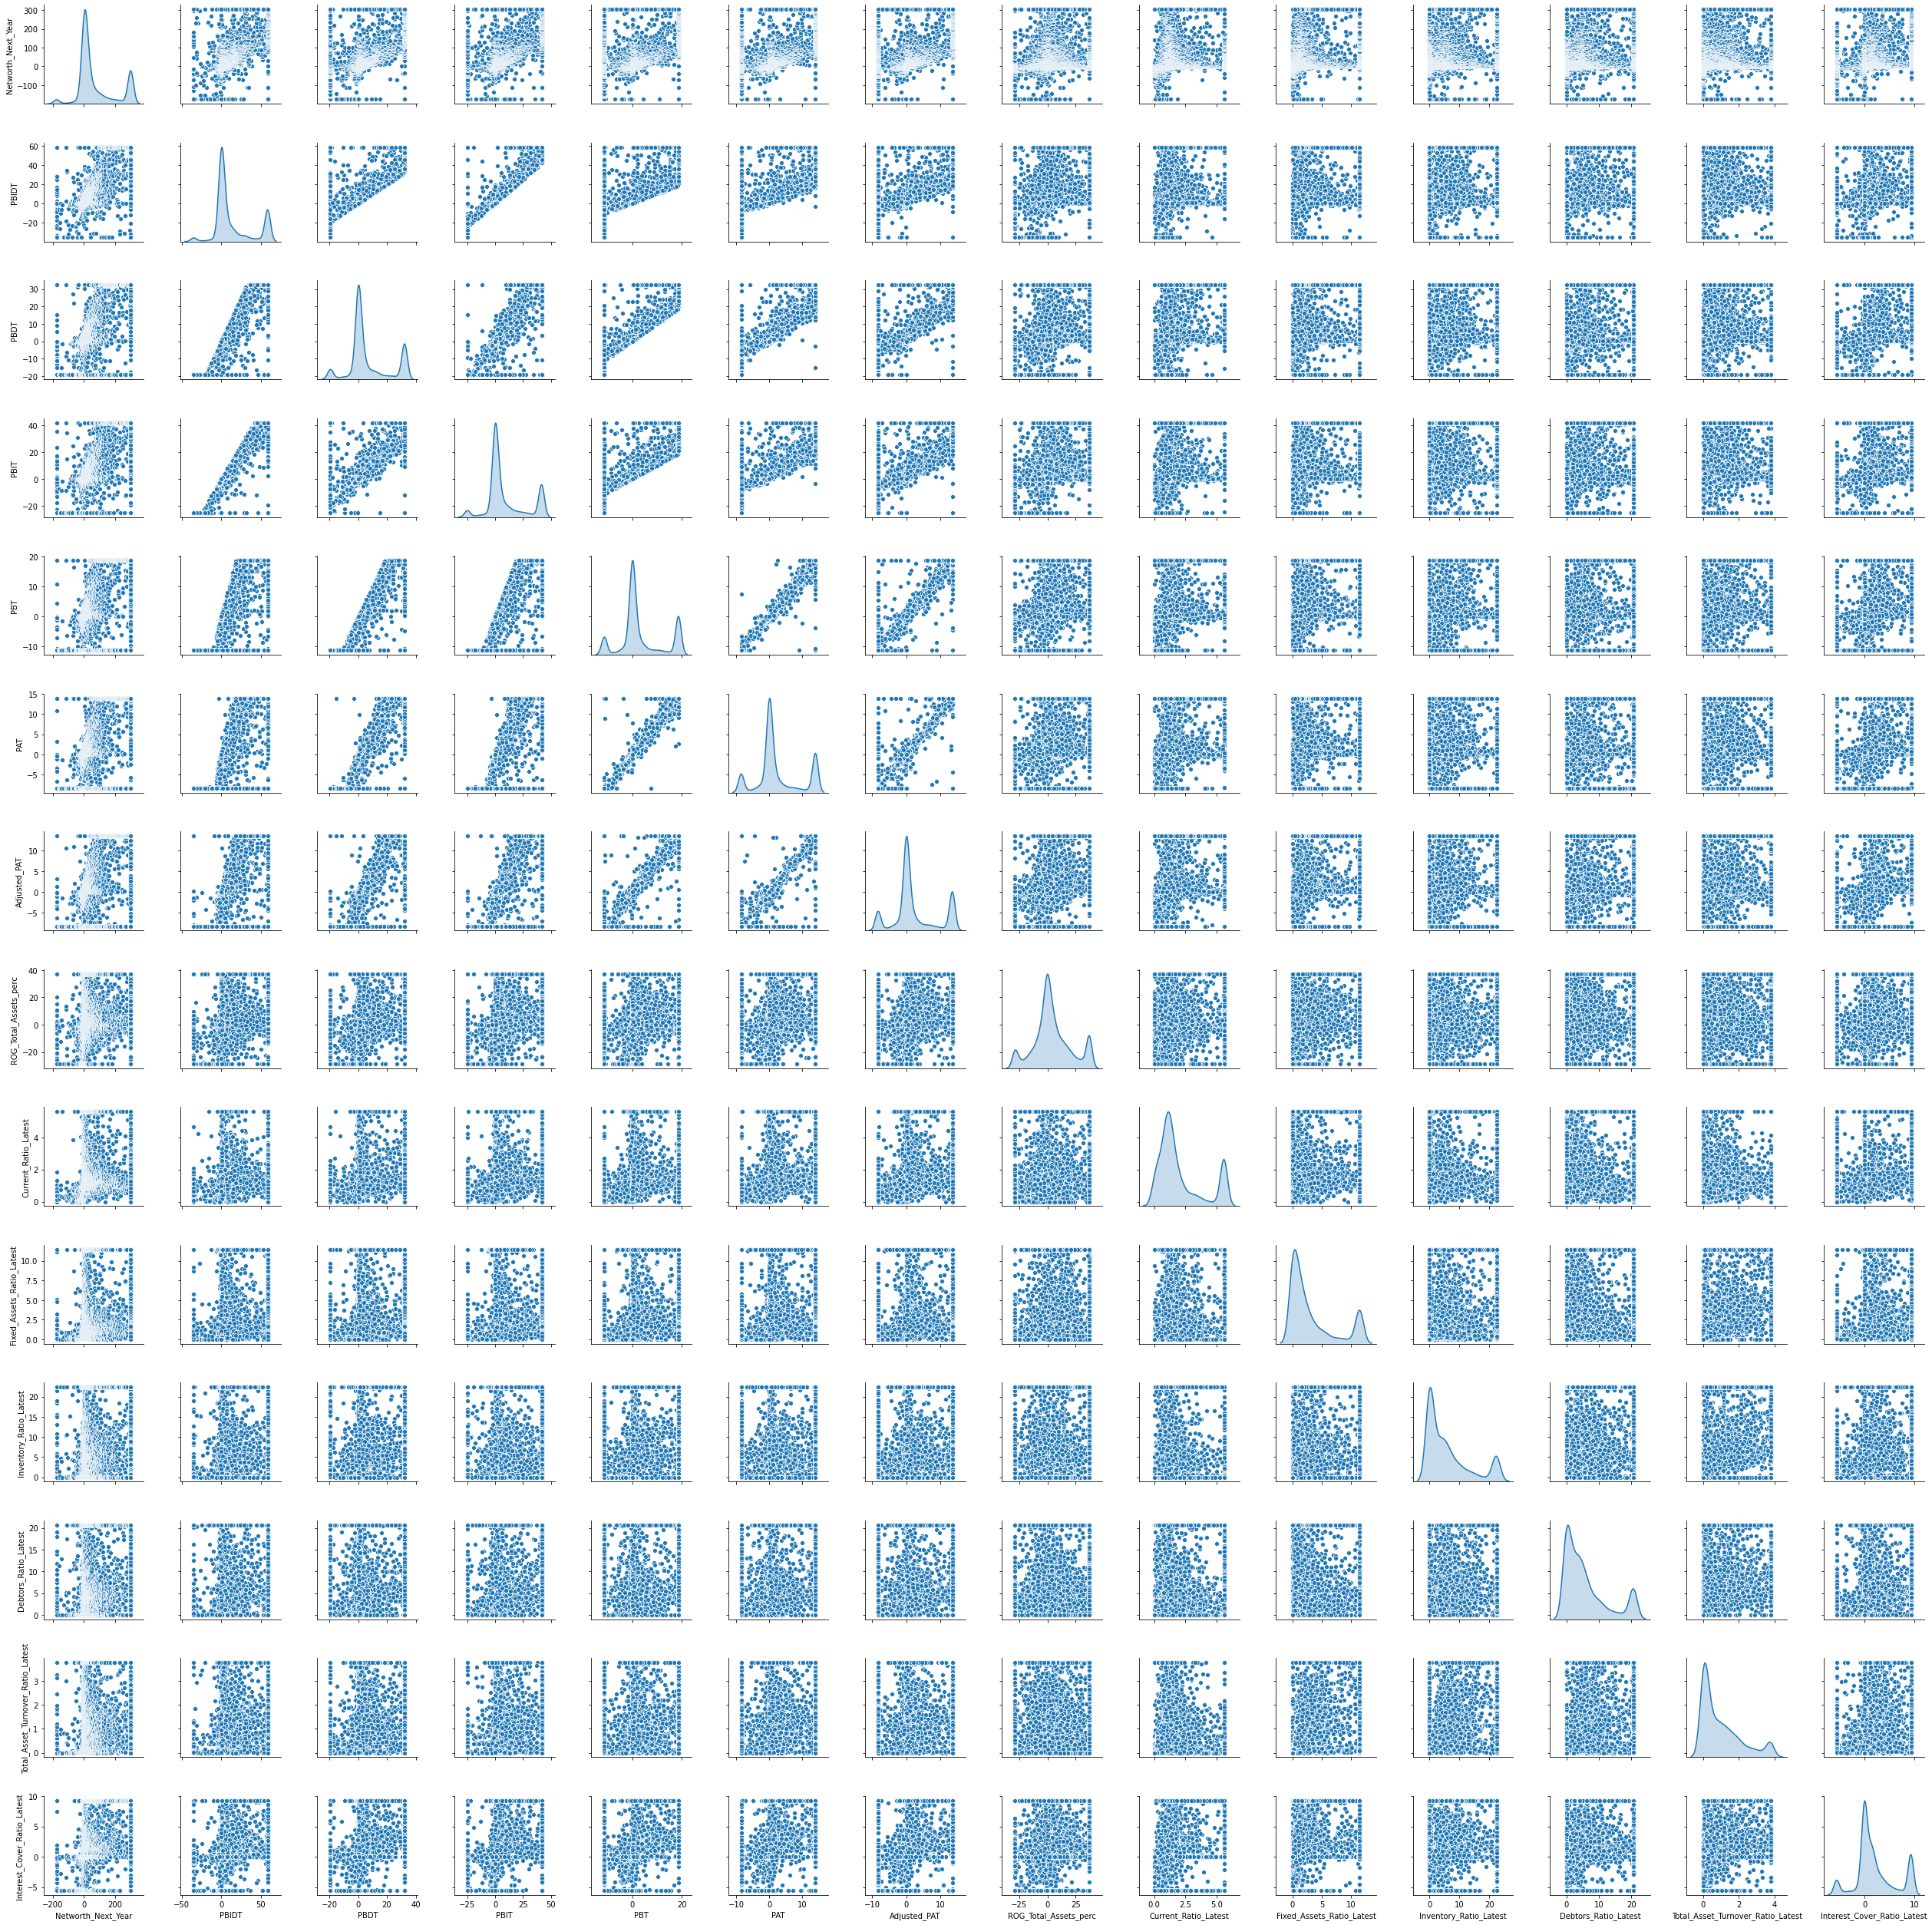

In [51]:
sns.pairplot(cp_2,diag_kind = 'kde')

### Fixing target variable

In [52]:
cp_2['default'] = np.where((cp_2['Networth_Next_Year'] > 0), 0, 1)
cp1['default'] = np.where((cp1['Networth_Next_Year'] > 0), 0, 1)

In [53]:
cp['default'] = np.where((cp['Networth_Next_Year'] > 0), 0, 1)
cp[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

In [54]:
cp[['default','Networth_Next_Year']].tail(10)

default  Networth_Next_Year
3576        0            43811.23
3577        0            46637.38
3578        0            47261.30
3579        0            53164.91
3580        0            61082.00
3581        0            72677.77
3582        0            79162.19
3583        0            88134.31
3584        0            91293.70
3585        0           111729.10

In [55]:
cp_2[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1          -175.74125
1        1          -175.74125
2        1          -175.74125
3        1          -175.74125
4        1          -175.74125
5        1          -175.74125
6        1          -175.74125
7        1          -175.74125
8        1          -175.74125
9        1          -175.74125

In [56]:
cp_2[['default','Networth_Next_Year']].tail(10)

default  Networth_Next_Year
3576        0           303.52875
3577        0           303.52875
3578        0           303.52875
3579        0           303.52875
3580        0           303.52875
3581        0           303.52875
3582        0           303.52875
3583        0           303.52875
3584        0           303.52875
3585        0           303.52875

In [57]:
cp_2['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [58]:
388/(3198+388)

0.10819854991634133

In [59]:
cp_2['default'].describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

## Bivariate Analysis

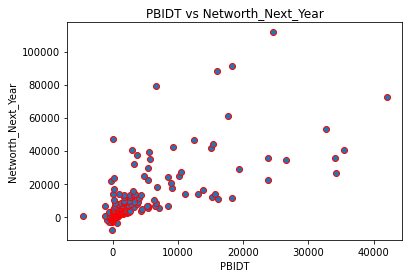

In [60]:
#Before removing outlier
plt.scatter(cp['PBIDT'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBIDT')
plt.ylabel('Networth_Next_Year')
plt.title('PBIDT vs Networth_Next_Year')
plt.show()

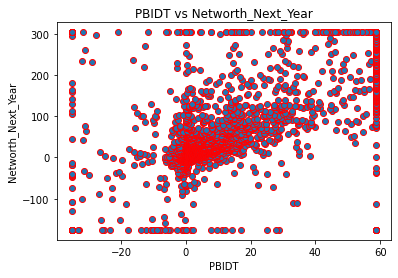

In [61]:
#After removing outlier
plt.scatter(cp1['PBIDT'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBIDT')
plt.ylabel('Networth_Next_Year')
plt.title('PBIDT vs Networth_Next_Year')
plt.show()

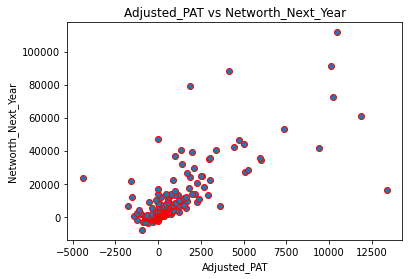

In [62]:
#Before removing outlier
plt.scatter(cp['Adjusted_PAT'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Adjusted_PAT')
plt.ylabel('Networth_Next_Year')
plt.title('Adjusted_PAT vs Networth_Next_Year')
plt.show()

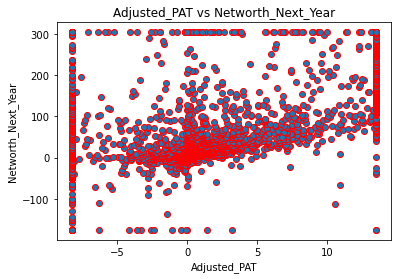

In [63]:
#After removing outlier
plt.scatter(cp1['Adjusted_PAT'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Adjusted_PAT')
plt.ylabel('Networth_Next_Year')
plt.title('Adjusted_PAT vs Networth_Next_Year')
plt.show()

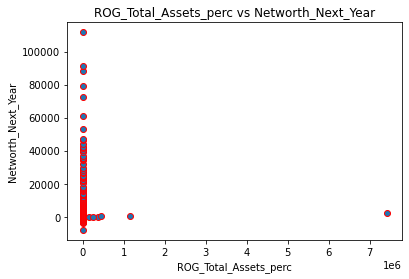

In [64]:
#Before removing outlier
plt.scatter(cp['ROG_Total_Assets_perc'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('ROG_Total_Assets_perc')
plt.ylabel('Networth_Next_Year')
plt.title('ROG_Total_Assets_perc vs Networth_Next_Year')
plt.show()

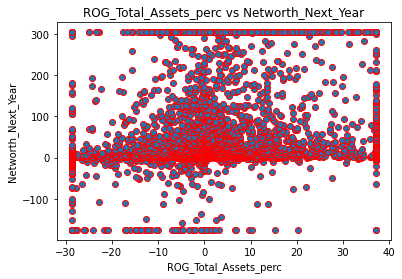

In [65]:
#After removing outlier
plt.scatter(cp1['ROG_Total_Assets_perc'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('ROG_Total_Assets_perc')
plt.ylabel('Networth_Next_Year')
plt.title('ROG_Total_Assets_perc vs Networth_Next_Year')
plt.show()

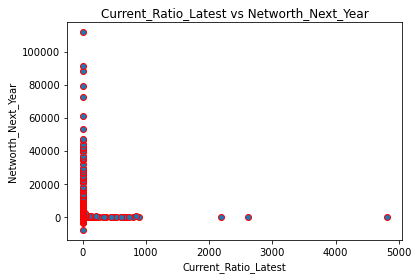

In [66]:
#Before removing outlier
plt.scatter(cp['Current_Ratio_Latest'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Current_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Current_Ratio_Latest vs Networth_Next_Year')
plt.show()

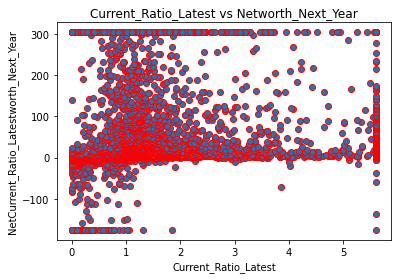

In [67]:
#After removing outlier
plt.scatter(cp1['Current_Ratio_Latest'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Current_Ratio_Latest')
plt.ylabel('NetCurrent_Ratio_Latestworth_Next_Year')
plt.title('Current_Ratio_Latest vs Networth_Next_Year')
plt.show()

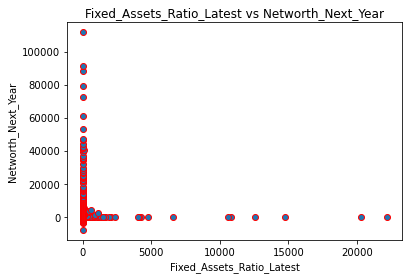

In [68]:
#Before removing outlier
plt.scatter(cp['Fixed_Assets_Ratio_Latest'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Fixed_Assets_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Fixed_Assets_Ratio_Latest vs Networth_Next_Year')
plt.show()

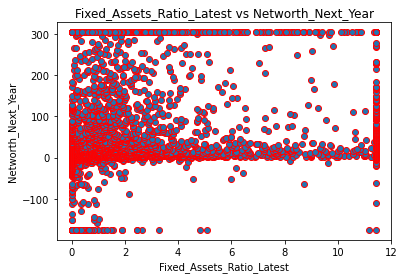

In [69]:
#After removing outlier
plt.scatter(cp1['Fixed_Assets_Ratio_Latest'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Fixed_Assets_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Fixed_Assets_Ratio_Latest vs Networth_Next_Year')
plt.show()

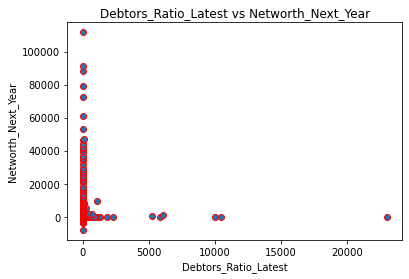

In [70]:
#Before removing outlier
plt.scatter(cp['Debtors_Ratio_Latest'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Debtors_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Debtors_Ratio_Latest vs Networth_Next_Year')
plt.show()

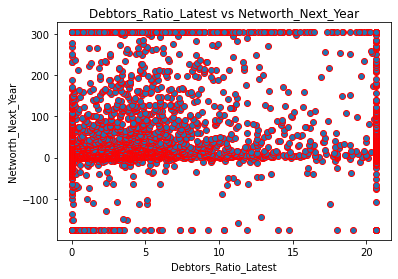

In [71]:
#After removing outlier
plt.scatter(cp1['Debtors_Ratio_Latest'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Debtors_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Debtors_Ratio_Latest vs Networth_Next_Year')
plt.show()

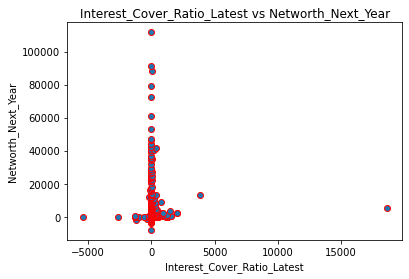

In [72]:
#Before removing outlier
plt.scatter(cp['Interest_Cover_Ratio_Latest'], cp['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Interest_Cover_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Interest_Cover_Ratio_Latest vs Networth_Next_Year')
plt.show()

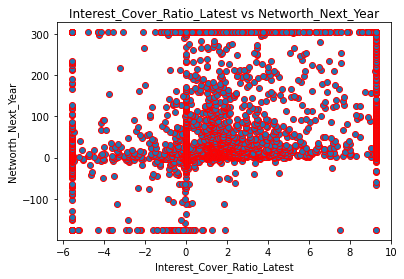

In [73]:
#After removing outlier
plt.scatter(cp1['Interest_Cover_Ratio_Latest'], cp1['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Interest_Cover_Ratio_Latest')
plt.ylabel('Networth_Next_Year')
plt.title('Interest_Cover_Ratio_Latest vs Networth_Next_Year')
plt.show()

## Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$


Now, Importing statsmodels modules

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

## Test Train Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
y = cp1['default']
X = cp1.drop(['default'],axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [77]:
cp_train = pd.concat([X_train, y_train], axis = 1)
cp_test = pd.concat([X_test, y_test], axis = 1)

In [78]:
import statsmodels.formula.api as SM

# Model 1

In [79]:
f_1 = 'default ~ PBIDT + PBDT + PBIT + PBT + PAT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [80]:
model_1 = SM.logit(formula = f_1, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.210122
         Iterations 8


In [81]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3622
Time:                        20:15:51   Log-Likelihood:                -504.71
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.825e-114
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.3747      0.148     -2.530      0.011      -0.665      -0.084
PBIDT                                -0.0364      0.014     -2.697      0.007      -0.063      -0.010
PBDT                                 -0.0288      0.022     -1.302      0.193      -0.072       0.015
PBIT                                  0.0187      0.020      0.942      0.346      -0.020       0.058
PBT                                  -0.0646      0.060     -1.070      0.284      -0.183       0.054
PAT                                   0.1044      0.077      1.362      0.173      -0.046       0.255
Adjusted_PAT                         -0.0745      0.042     -1.775      0.076      -0.157       0.008
ROG_Total_Assets_perc                -0.0189      0.006     -3.346      0.001      -0.030      -0.008
Current_Ratio_Latest                 -0.7751      0.091     -8.530      0.000      -0.953      -0.597
Fixed_Assets_Ratio_Latest            -0.1560      0.038     -4.081      0.000      -0.231      -0.081
Inventory_Ratio_Latest               -0.0108      0.013     -0.804      0.422      -0.037       0.016
Debtors_Ratio_Latest                 -0.0372      0.015     -2.436      0.015      -0.067      -0.007
Total_Asset_Turnover_Ratio_Latest     0.1632      0.106      1.537      0.124      -0.045       0.371
Interest_Cover_Ratio_Latest          -0.1263      0.029     -4.365      0.000      -0.183      -0.070
=====================================================================================================
"""

#### If a variable has P-value is greater than 0.05, then the variable is insignificant while building the model. Here, P-value of Inventory_Ratio_Latest is the highest i.e,0.422. Hence the variable can be dropped

# Model 2

In [82]:
f_2 = 'default ~ PBIDT + PBDT + PBIT + PBT + PAT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [83]:
model_2 = SM.logit(formula = f_2, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.210259
         Iterations 8


In [84]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3618
Time:                        20:15:51   Log-Likelihood:                -505.04
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.469e-115
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.3936      0.146     -2.687      0.007      -0.681      -0.106
PBIDT                                -0.0366      0.013     -2.715      0.007      -0.063      -0.010
PBDT                                 -0.0296      0.022     -1.345      0.179      -0.073       0.014
PBIT                                  0.0189      0.020      0.956      0.339      -0.020       0.058
PBT                                  -0.0637      0.060     -1.054      0.292      -0.182       0.055
PAT                                   0.1055      0.077      1.375      0.169      -0.045       0.256
Adjusted_PAT                         -0.0742      0.042     -1.772      0.076      -0.156       0.008
ROG_Total_Assets_perc                -0.0188      0.006     -3.339      0.001      -0.030      -0.008
Current_Ratio_Latest                 -0.7750      0.091     -8.510      0.000      -0.953      -0.596
Fixed_Assets_Ratio_Latest            -0.1575      0.038     -4.103      0.000      -0.233      -0.082
Debtors_Ratio_Latest                 -0.0398      0.015     -2.666      0.008      -0.069      -0.011
Total_Asset_Turnover_Ratio_Latest     0.1406      0.103      1.371      0.170      -0.060       0.342
Interest_Cover_Ratio_Latest          -0.1268      0.029     -4.399      0.000      -0.183      -0.070
=====================================================================================================
"""

#### p-value of PBIT is the highest i.e,0.339 and is insignificant. Hence the variable can be dropped

## Model 3

In [85]:
f_3 = 'default ~ PBIDT + PBDT + PBT + PAT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [86]:
model_3 = SM.logit(formula = f_3, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.210464
         Iterations 8


In [87]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3612
Time:                        20:15:52   Log-Likelihood:                -505.53
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.641e-115
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.3944      0.146     -2.696      0.007      -0.681      -0.108
PBIDT                                -0.0261      0.007     -3.793      0.000      -0.040      -0.013
PBDT                                 -0.0281      0.022     -1.286      0.199      -0.071       0.015
PBT                                  -0.0561      0.061     -0.923      0.356      -0.175       0.063
PAT                                   0.1092      0.078      1.401      0.161      -0.044       0.262
Adjusted_PAT                         -0.0751      0.042     -1.794      0.073      -0.157       0.007
ROG_Total_Assets_perc                -0.0188      0.006     -3.329      0.001      -0.030      -0.008
Current_Ratio_Latest                 -0.7768      0.091     -8.518      0.000      -0.955      -0.598
Fixed_Assets_Ratio_Latest            -0.1536      0.038     -4.030      0.000      -0.228      -0.079
Debtors_Ratio_Latest                 -0.0408      0.015     -2.739      0.006      -0.070      -0.012
Total_Asset_Turnover_Ratio_Latest     0.1356      0.102      1.324      0.185      -0.065       0.336
Interest_Cover_Ratio_Latest          -0.1267      0.029     -4.399      0.000      -0.183      -0.070
=====================================================================================================
"""

#### p-value of PBT is the highest i.e,0.356 and is insignificant. Hence the variable can be dropped

## Model 4

In [88]:
f_4 = 'default ~ PBIDT + PBDT + PAT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [89]:
model_4 = SM.logit(formula = f_4, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.210611
         Iterations 8


In [90]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3607
Time:                        20:15:52   Log-Likelihood:                -505.89
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.994e-116
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.3947      0.146     -2.699      0.007      -0.681      -0.108
PBIDT                                -0.0256      0.007     -3.751      0.000      -0.039      -0.012
PBDT                                 -0.0331      0.022     -1.533      0.125      -0.075       0.009
PAT                                   0.0524      0.054      0.972      0.331      -0.053       0.158
Adjusted_PAT                         -0.0823      0.042     -1.957      0.050      -0.165       0.000
ROG_Total_Assets_perc                -0.0186      0.006     -3.307      0.001      -0.030      -0.008
Current_Ratio_Latest                 -0.7752      0.091     -8.519      0.000      -0.954      -0.597
Fixed_Assets_Ratio_Latest            -0.1547      0.038     -4.061      0.000      -0.229      -0.080
Debtors_Ratio_Latest                 -0.0403      0.015     -2.702      0.007      -0.069      -0.011
Total_Asset_Turnover_Ratio_Latest     0.1382      0.102      1.350      0.177      -0.062       0.339
Interest_Cover_Ratio_Latest          -0.1271      0.029     -4.413      0.000      -0.184      -0.071
=====================================================================================================
"""

#### P-value of PAT is the highest i.e,0.331 and is insignificant. Hence the variable can be dropped

## Model 5

In [91]:
f_5 = 'default ~ PBIDT + PBDT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [92]:
model_5 = SM.logit(formula = f_5, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.210806
         Iterations 8


In [93]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3601
Time:                        20:15:52   Log-Likelihood:                -506.36
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.801e-117
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.4139      0.145     -2.853      0.004      -0.698      -0.130
PBIDT                                -0.0261      0.007     -3.812      0.000      -0.040      -0.013
PBDT                                 -0.0210      0.017     -1.224      0.221      -0.055       0.013
Adjusted_PAT                         -0.0540      0.032     -1.705      0.088      -0.116       0.008
ROG_Total_Assets_perc                -0.0179      0.006     -3.215      0.001      -0.029      -0.007
Current_Ratio_Latest                 -0.7716      0.091     -8.477      0.000      -0.950      -0.593
Fixed_Assets_Ratio_Latest            -0.1524      0.038     -4.011      0.000      -0.227      -0.078
Debtors_Ratio_Latest                 -0.0403      0.015     -2.702      0.007      -0.070      -0.011
Total_Asset_Turnover_Ratio_Latest     0.1325      0.102      1.295      0.195      -0.068       0.333
Interest_Cover_Ratio_Latest          -0.1249      0.029     -4.350      0.000      -0.181      -0.069
=====================================================================================================
"""

#### P-value of PBDT is the highest i.e,0.221 and is insignificant. Hence the variable can be dropped

## Model 6

In [94]:
f_6 = 'default ~ PBIDT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [95]:
model_6 = SM.logit(formula = f_6, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.211117
         Iterations 8


In [96]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3592
Time:                        20:15:53   Log-Likelihood:                -507.10
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.392e-117
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.4079      0.145     -2.815      0.005      -0.692      -0.124
PBIDT                                -0.0316      0.006     -5.657      0.000      -0.043      -0.021
Adjusted_PAT                         -0.0816      0.021     -3.836      0.000      -0.123      -0.040
ROG_Total_Assets_perc                -0.0182      0.006     -3.258      0.001      -0.029      -0.007
Current_Ratio_Latest                 -0.7743      0.091     -8.513      0.000      -0.953      -0.596
Fixed_Assets_Ratio_Latest            -0.1493      0.038     -3.945      0.000      -0.223      -0.075
Debtors_Ratio_Latest                 -0.0400      0.015     -2.679      0.007      -0.069      -0.011
Total_Asset_Turnover_Ratio_Latest     0.1174      0.101      1.157      0.247      -0.081       0.316
Interest_Cover_Ratio_Latest          -0.1225      0.029     -4.295      0.000      -0.178      -0.067
=====================================================================================================
"""

#### P-value of Total_Asset_Turnover_Ratio_Latest is the highest i.e,0.247 and is insignificant. Hence the variable can be dropped

## Model 7

In [97]:
f_7 = 'default ~ PBIDT + Adjusted_PAT + ROG_Total_Assets_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest'

In [98]:
model_7 = SM.logit(formula = f_7, data=cp_train).fit()

Optimization terminated successfully.
         Current function value: 0.211394
         Iterations 8


In [99]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3583
Time:                        20:15:53   Log-Likelihood:                -507.77
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.877e-118
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3876      0.143     -2.711      0.007      -0.668      -0.107
PBIDT                          -0.0311      0.006     -5.644      0.000      -0.042      -0.020
Adjusted_PAT                   -0.0817      0.021     -3.864      0.000      -0.123      -0.040
ROG_Total_Assets_perc          -0.0185      0.006     -3.331      0.001      -0.029      -0.008
Current_Ratio_Latest           -0.7697      0.089     -8.612      0.000      -0.945      -0.595
Fixed_Assets_Ratio_Latest      -0.1312      0.033     -3.921      0.000      -0.197      -0.066
Debtors_Ratio_Latest           -0.0332      0.014     -2.453      0.014      -0.060      -0.007
Interest_Cover_Ratio_Latest    -0.1181      0.028     -4.179      0.000      -0.173      -0.063
===============================================================================================
"""

#### P-value of all variables are less than 0.05 and significant. Hence all variables in above model can be retained. 

### VIF Analysis for the variables selected above

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [101]:
X = cp_2[['PBIDT','Adjusted_PAT','ROG_Total_Assets_perc','Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest']]
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1                 Adjusted_PAT  2.924862
0                        PBIDT  2.910964
4    Fixed_Assets_Ratio_Latest  1.746626
6  Interest_Cover_Ratio_Latest  1.734914
5         Debtors_Ratio_Latest  1.682335
3         Current_Ratio_Latest  1.538367
2        ROG_Total_Assets_perc  1.215303

### VIF for all variables are less than 3. Hence need not eliminate any variable.

In [102]:
y_prob_pred_train = model_7.predict(cp_train)
y_prob_pred_train

662     0.009642
1373    0.008687
3268    0.007222
3246    0.007987
1456    0.022072
2092    0.059900
3571    0.010662
3393    0.003604
1912    0.036354
845     0.047507
542     0.115390
1891    0.044784
2292    0.049284
2611    0.153908
1196    0.002322
1102    0.001033
2642    0.008378
3007    0.001276
3277    0.000652
1487    0.025250
2234    0.001974
1442    0.066452
1048    0.051595
2817    0.013106
3554    0.466775
1866    0.003848
1612    0.006280
237     0.157109
2084    0.070258
3249    0.004230
1133    0.063991
2341    0.018792
3440    0.830336
163     0.614574
1494    0.006269
252     0.053019
1775    0.015592
2333    0.005499
930     0.004650
1644    0.001611
1378    0.006299
3156    0.495642
2785    0.000309
1739    0.014309
2453    0.001508
1952    0.006830
1090    0.008988
2860    0.257794
1181    0.003336
593     0.362893
677     0.165294
41      0.846741
2942    0.000482
2098    0.083927
2530    0.006779
243     0.404284
1124    0.122744
2288    0.005695
1488    0.0221

In [103]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [104]:
from sklearn import metrics

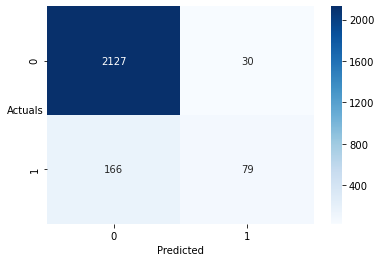

In [105]:
sns.heatmap((metrics.confusion_matrix(cp_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [106]:
y_prob_pred = model_7.predict()

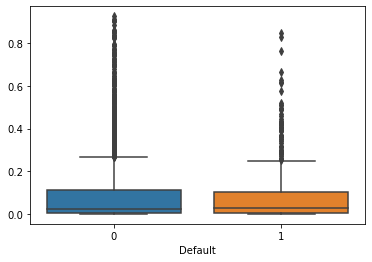

In [107]:
sns.boxplot(x=cp1['default'],y=y_prob_pred)
plt.xlabel('Default');

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(cp_train['default'],y_prob_pred_train)

In [109]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.15710897314812053

In [110]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.157:
        a=1
    else:
        a=0
    y_class_pred.append(a)

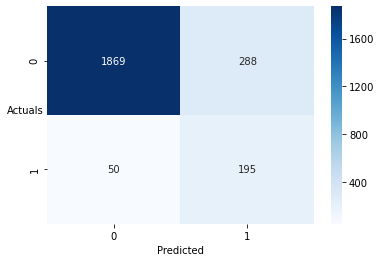

In [111]:
sns.heatmap((metrics.confusion_matrix(cp_train['default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [112]:
print(metrics.classification_report(cp_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.974     0.866     0.917      2157
           1      0.404     0.796     0.536       245

    accuracy                          0.859      2402
   macro avg      0.689     0.831     0.726      2402
weighted avg      0.916     0.859     0.878      2402



In [113]:
y_prob_pred_test = model_7.predict(cp_test)
y_prob_pred_test

3163    0.002791
3133    0.004318
937     0.013115
196     0.227381
2852    0.112247
120     0.307078
2916    0.003277
33      0.406582
1222    0.332368
2529    0.005578
2910    0.001626
3287    0.001822
1419    0.008912
2002    0.131628
2037    0.008048
567     0.004700
1864    0.002531
511     0.026436
149     0.421757
2688    0.088166
864     0.007717
1506    0.008089
2832    0.002631
2752    0.002017
486     0.198144
794     0.001714
1164    0.008520
810     0.008125
642     0.009457
3222    0.004051
1777    0.147001
2323    0.004498
2447    0.000170
1034    0.014835
457     0.386159
298     0.016352
325     0.041687
3427    0.175909
2534    0.235720
1780    0.040482
134     0.878814
949     0.342474
408     0.057500
1234    0.008715
1097    0.088667
691     0.009003
1514    0.062548
1452    0.039211
2223    0.003076
2297    0.048975
1295    0.039383
2096    0.026441
990     0.002352
2915    0.612659
2181    0.010400
2316    0.083987
761     0.008867
3245    0.016822
322     0.1292

In [114]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.157:
        a=1
    else:
        a=0
    y_class_pred.append(a)

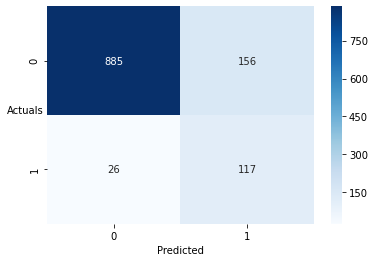

In [115]:
sns.heatmap((metrics.confusion_matrix(cp_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');  
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [116]:
print(metrics.classification_report(cp_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.971     0.850     0.907      1041
           1      0.429     0.818     0.562       143

    accuracy                          0.846      1184
   macro avg      0.700     0.834     0.735      1184
weighted avg      0.906     0.846     0.865      1184



## Reducing the optimum cutoff to 0.108 (Proportion of default values)


In [117]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.108:
        a=1
    else:
        a=0
    y_class_pred.append(a)

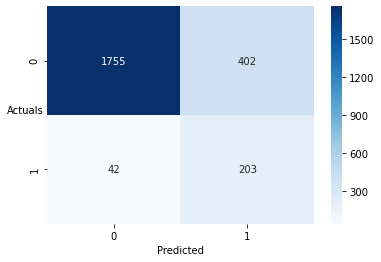

In [118]:
sns.heatmap((metrics.confusion_matrix(cp_train['default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [119]:
print(metrics.classification_report(cp_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.977     0.814     0.888      2157
           1      0.336     0.829     0.478       245

    accuracy                          0.815      2402
   macro avg      0.656     0.821     0.683      2402
weighted avg      0.911     0.815     0.846      2402



In [120]:
y_prob_pred_test = model_7.predict(cp_test)

In [121]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.108:
        a=1
    else:
        a=0
    y_class_pred.append(a)

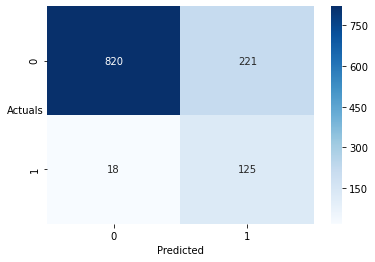

In [122]:
sns.heatmap((metrics.confusion_matrix(cp_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');  
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [123]:
print(metrics.classification_report(cp_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.788     0.873      1041
           1      0.361     0.874     0.511       143

    accuracy                          0.798      1184
   macro avg      0.670     0.831     0.692      1184
weighted avg      0.904     0.798     0.829      1184



## Changing the optimum cutoff to 0.12

In [124]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred.append(a)


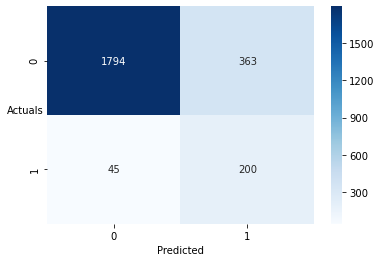

In [125]:
sns.heatmap((metrics.confusion_matrix(cp_train['default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [126]:
print(metrics.classification_report(cp_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.976     0.832     0.898      2157
           1      0.355     0.816     0.495       245

    accuracy                          0.830      2402
   macro avg      0.665     0.824     0.696      2402
weighted avg      0.912     0.830     0.857      2402



In [127]:
y_prob_pred_test = model_7.predict(cp_test)

In [128]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred.append(a)

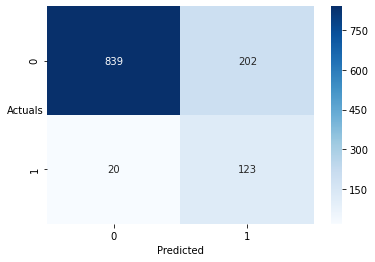

In [131]:
sns.heatmap((metrics.confusion_matrix(cp_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');  
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [132]:
print(metrics.classification_report(cp_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.977     0.806     0.883      1041
           1      0.378     0.860     0.526       143

    accuracy                          0.812      1184
   macro avg      0.678     0.833     0.704      1184
weighted avg      0.904     0.812     0.840      1184



Since, both sensitivity and specificity of the model are above 80% when the cut-off is set as 0.12, the optimum cut-off is fixed as 0.12.